# 1. Project Root and Importing statements

In [1]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 1: Add project root to path

import os
import sys

# Get the current working directory of the notebook (e.g., 'fraud_detection_project/notebooks/')
current_dir = os.getcwd()
# Get the parent directory (which is 'fraud_detection_project/')
project_root = os.path.dirname(current_dir)

# Add the project root to sys.path so Python can find 'src'
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path.")
else:
    print(f"'{project_root}' already in sys.path.")
# notebooks/eda_ecommerce_fraud.ipynb - Cell 2: Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import functions from our data_preprocessing.py script
from src.data_preprocessing import (
    load_fraud_data,
    load_ip_country_data,
    merge_fraud_with_ip_data,
    handle_missing_values,
    remove_duplicates,
    correct_data_types,
    create_time_features,
    create_transaction_frequency_velocity
)

# Configure plot styles for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

Added 'c:\Users\skibret\Downloads\KAIM\Week 8\Project\fraud_detection_project' to sys.path.


# 2. Load Raw Data

In [2]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 3: Load Raw Data

print("--- Loading E-commerce Fraud Data ---")
fraud_df = load_fraud_data()
ip_country_df = load_ip_country_data()

if fraud_df is not None:
    print("\nFraud_Data.csv loaded successfully.")
    print("Shape:", fraud_df.shape)
    print("Columns:", fraud_df.columns.tolist())
    print("\nFirst 5 rows:")
    print(fraud_df.head())
else:
    print("Failed to load Fraud_Data.csv. Please check the path and file existence.")

if ip_country_df is not None:
    print("\nIpAddress_to_Country.csv loaded successfully.")
    print("Shape:", ip_country_df.shape)
    print("Columns:", ip_country_df.columns.tolist())
    print("\nFirst 5 rows:")
    print(ip_country_df.head())
else:
    print("Failed to load IpAddress_to_Country.csv. Please check the path and file existence.")

--- Loading E-commerce Fraud Data ---


2025-07-26 14:24:42,485 - INFO - Successfully loaded Fraud_Data.csv from C:/Users/skibret/Downloads/KAIM/Week 8/Project/fraud_detection_project/data/raw/Fraud_Data.csv. Shape: (151112, 11)
2025-07-26 14:24:42,544 - INFO - Successfully loaded IpAddress_to_Country.csv from C:/Users/skibret/Downloads/KAIM/Week 8/Project/fraud_detection_project/data/raw/IpAddress_to_Country.csv. Shape: (138846, 3)



Fraud_Data.csv loaded successfully.
Shape: (151112, 11)
Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

First 5 rows:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari  

# 3.  Initial Data Cleaning & Type Correction

In [3]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 4: Initial Data Cleaning & Type Correction

if fraud_df is not None:
    print("\n--- Initial Cleaning & Type Correction for Fraud_Data ---")

    # Convert timestamp columns to datetime objects early for time-based features
    fraud_df = correct_data_types(fraud_df, datetime_cols=['signup_time', 'purchase_time'])

    # Handle missing values in critical columns for merging/analysis
    # For initial EDA, let's drop rows where IP address is missing as it's crucial for geolocation.
    # We'll refine the strategy for other missing values later.
    initial_rows = fraud_df.shape[0]
    if 'ip_address' in fraud_df.columns:
        fraud_df_cleaned = fraud_df.dropna(subset=['ip_address']).copy()
        print(f"Dropped {initial_rows - fraud_df_cleaned.shape[0]} rows with missing IP addresses.")
    else:
        print("Warning: 'ip_address' column not found. Skipping IP-based missing value handling.")
        fraud_df_cleaned = fraud_df.copy()

    # Remove duplicates
    fraud_df_cleaned = remove_duplicates(fraud_df_cleaned)

    print("\nFraud_Data after initial cleaning and type correction:")
    fraud_df_cleaned.info()
    print("\nMissing values remaining (if any):\n", fraud_df_cleaned.isnull().sum())
else:
    print("Fraud_Data not loaded. Skipping initial cleaning.")

2025-07-26 14:24:42,637 - INFO - Converted 'signup_time' to datetime.
2025-07-26 14:24:42,703 - INFO - Converted 'purchase_time' to datetime.



--- Initial Cleaning & Type Correction for Fraud_Data ---
Dropped 0 rows with missing IP addresses.


2025-07-26 14:24:42,827 - INFO - Removed 0 duplicate rows.



Fraud_Data after initial cleaning and type correction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB

Missing values remaining (if any):
 user_id           0
signu

# 4. Merge with IP Address Data

In [4]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 5: Merge with IP Address Data

if fraud_df_cleaned is not None and ip_country_df is not None:
    print("\n--- Merging Fraud Data with IP Address to Country Mapping ---")
    merged_fraud_df = merge_fraud_with_ip_data(fraud_df_cleaned, ip_country_df)

    if merged_fraud_df is not None:
        print("\nMerged Fraud Data Info:")
        merged_fraud_df.info()
        print("\nMerged Fraud Data Head:")
        print(merged_fraud_df.head())
        print("\nValue counts for 'country' after merge (top 10):")
        # Ensure 'country' column exists before trying to access it
        if 'country' in merged_fraud_df.columns:
            print(merged_fraud_df['country'].value_counts().head(10))
        else:
            print("Warning: 'country' column not found in merged DataFrame.")
    else:
        print("Failed to merge fraud data with IP country data. Check logs for details.")
else:
    print("One or both dataframes (fraud_df_cleaned, ip_country_df) are not available for merging.")

2025-07-26 14:24:42,896 - INFO - Starting fast IP-to-country mapping using IntervalTree...



--- Merging Fraud Data with IP Address to Country Mapping ---


2025-07-26 14:24:47,236 - INFO - Built IntervalTree for IP to country mapping.
2025-07-26 14:24:47,296 - INFO - Completed mapping IP addresses to countries. Resulting shape: (151112, 13)



Merged Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  ip_address_int  0 non-null       float64       
 12  country         0 non-null       float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(4)
memory usa

# 5.  EDA - Feature Engineering (Time-based & Transaction Frequency/Velocity)

In [5]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 6: Feature Engineering

if merged_fraud_df is not None:
    print("\n--- Creating Time-based Features ---")
    merged_fraud_df = create_time_features(merged_fraud_df, 'purchase_time')

    print("\n--- Creating Transaction Frequency & Velocity Features ---")
    # Ensure 'user_id' and 'purchase_value' exist for these features
    if 'user_id' in merged_fraud_df.columns and 'purchase_value' in merged_fraud_df.columns:
        merged_fraud_df = create_transaction_frequency_velocity(merged_fraud_df, 'user_id', 'purchase_time', window_days=7)
    else:
        print("Warning: 'user_id' or 'purchase_value' not found. Skipping frequency/velocity features.")

    print("\nMerged Fraud Data with All New Features Info:")
    merged_fraud_df.info()
    print("\nMerged Fraud Data with All New Features Head:")
    print(merged_fraud_df.head())
else:
    print("Merged fraud dataframe not available for feature engineering.")

2025-07-26 14:24:47,371 - INFO - Created 'hour_of_day' and 'day_of_week' features from 'purchase_time'.
2025-07-26 14:24:47,375 - INFO - Created 'time_since_signup' feature (in days).



--- Creating Time-based Features ---

--- Creating Transaction Frequency & Velocity Features ---


2025-07-26 14:24:55,650 - INFO - Created frequency and velocity features for 7 day window.



Merged Fraud Data with All New Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     151112 non-null  int64         
 1   signup_time                 151112 non-null  datetime64[ns]
 2   purchase_time               151112 non-null  datetime64[ns]
 3   purchase_value              151112 non-null  int64         
 4   device_id                   151112 non-null  object        
 5   source                      151112 non-null  object        
 6   browser                     151112 non-null  object        
 7   sex                         151112 non-null  object        
 8   age                         151112 non-null  int64         
 9   ip_address                  151112 non-null  float64       
 10  class                       151112 non-null  int64       

# 6. EDA - Class Distribution

2025-07-26 14:24:56,039 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\skibret\AppData\Local\Temp\ipykernel_17888\2858636557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=merged_fraud_df, palette='viridis')
2025-07-26 14:24:56,195 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


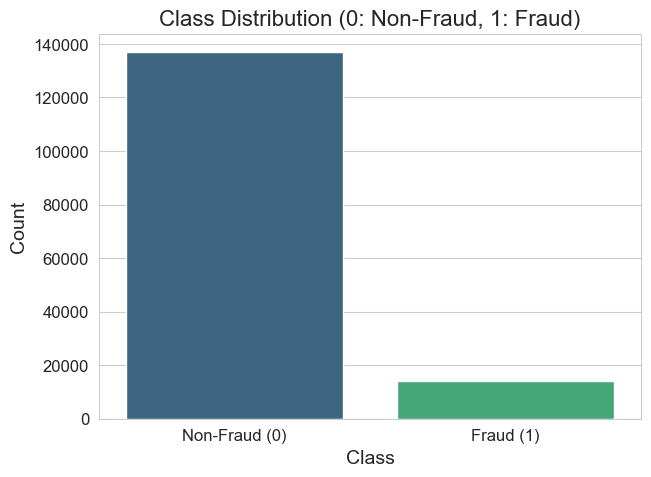


Class distribution (normalized):
 class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [6]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 7: EDA - Class Distribution

if merged_fraud_df is not None:
    plt.figure(figsize=(7, 5))
    sns.countplot(x='class', data=merged_fraud_df, palette='viridis')
    plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.show()
    print("\nClass distribution (normalized):\n", merged_fraud_df['class'].value_counts(normalize=True))
else:
    print("DataFrame not available for plotting.")

# 7. EDA - Purchase Value Distribution & vs. Class

2025-07-26 14:24:58,105 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\skibret\AppData\Local\Temp\ipykernel_17888\3102074373.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='purchase_value', data=merged_fraud_df, ax=axes[1], palette='pastel')
2025-07-26 14:24:58,224 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


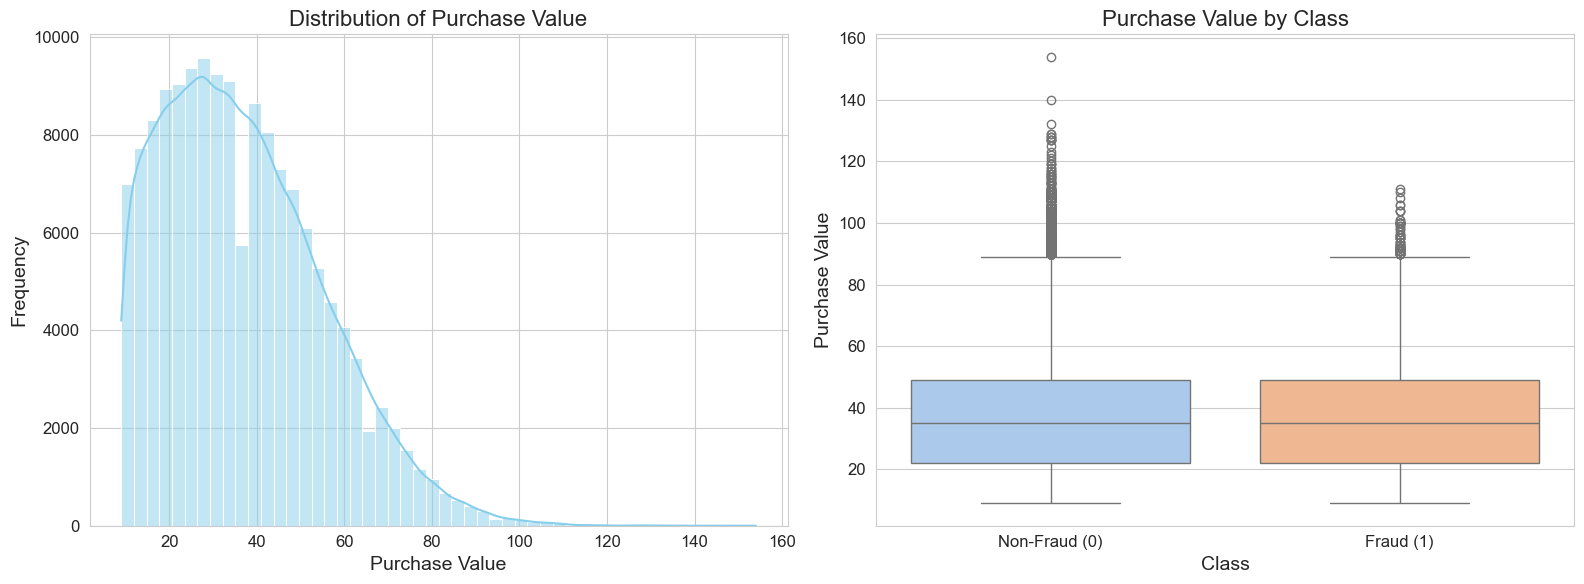

In [7]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 8: EDA - Purchase Value

if merged_fraud_df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Distribution
    sns.histplot(merged_fraud_df['purchase_value'], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Distribution of Purchase Value', fontsize=16)
    axes[0].set_xlabel('Purchase Value', fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)

    # Purchase Value vs. Class
    sns.boxplot(x='class', y='purchase_value', data=merged_fraud_df, ax=axes[1], palette='pastel')
    axes[1].set_title('Purchase Value by Class', fontsize=16)
    axes[1].set_xlabel('Class', fontsize=14)
    axes[1].set_ylabel('Purchase Value', fontsize=14)
    axes[1].set_xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not available for plotting.")

# 8.  EDA - Age Distribution

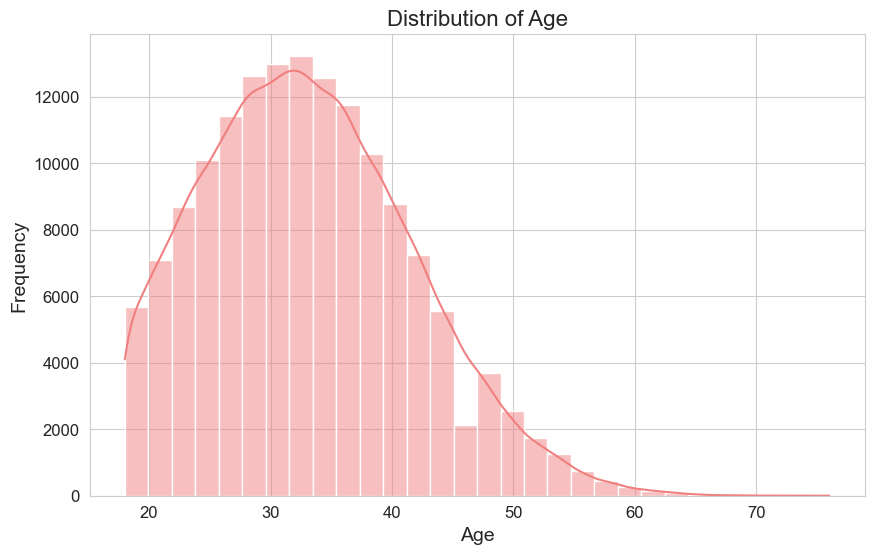

In [8]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 9: EDA - Age Distribution

if merged_fraud_df is not None:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_fraud_df['age'], bins=30, kde=True, color='lightcoral')
    plt.title('Distribution of Age', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()
else:
    print("DataFrame not available for plotting.")

# 9.   EDA - Fraud Rate by Source, Browser, Sex

C:\Users\skibret\AppData\Local\Temp\ipykernel_17888\3225098537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[0], palette='coolwarm')
C:\Users\skibret\AppData\Local\Temp\ipykernel_17888\3225098537.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='browser', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[1], palette='coolwarm')
C:\Users\skibret\AppData\Local\Temp\ipykernel_17888\3225098537.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex'

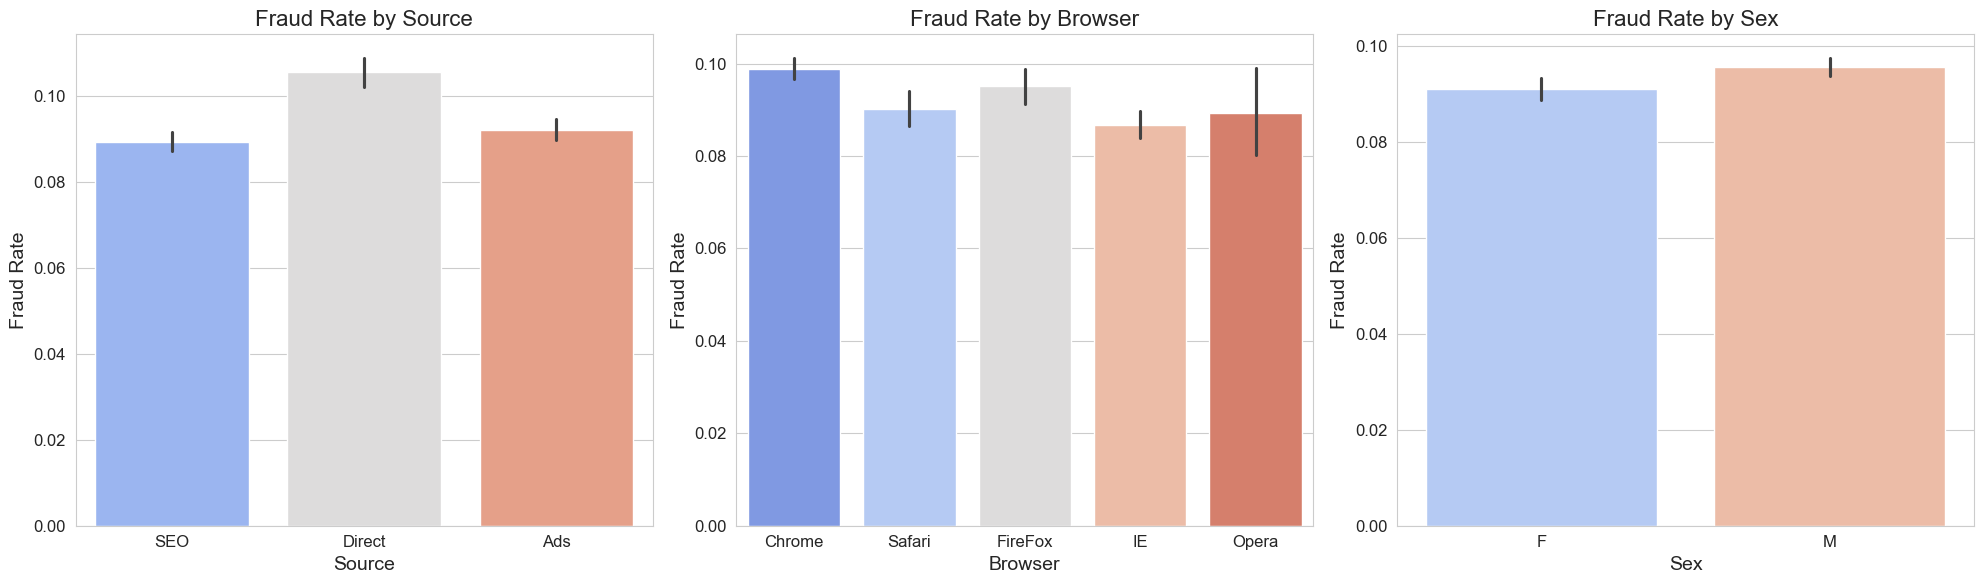

In [9]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 10: EDA - Categorical Features

if merged_fraud_df is not None:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Fraud rate by Source
    sns.barplot(x='source', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[0], palette='coolwarm')
    axes[0].set_title('Fraud Rate by Source', fontsize=16)
    axes[0].set_ylabel('Fraud Rate', fontsize=14)
    axes[0].set_xlabel('Source', fontsize=14)

    # Fraud rate by Browser
    sns.barplot(x='browser', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[1], palette='coolwarm')
    axes[1].set_title('Fraud Rate by Browser', fontsize=16)
    axes[1].set_ylabel('Fraud Rate', fontsize=14)
    axes[1].set_xlabel('Browser', fontsize=14)

    # Fraud rate by Sex
    sns.barplot(x='sex', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[2], palette='coolwarm')
    axes[2].set_title('Fraud Rate by Sex', fontsize=16)
    axes[2].set_ylabel('Fraud Rate', fontsize=14)
    axes[2].set_xlabel('Sex', fontsize=14)

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not available for plotting.")

# 10. EDA - Fraud Rate by Country (Top N)

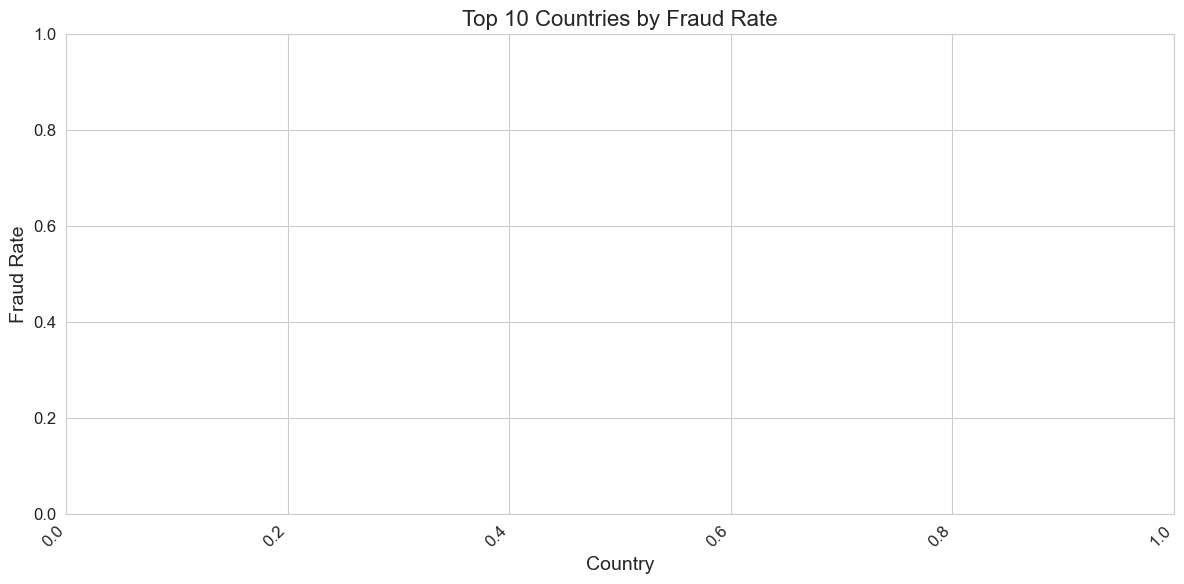

In [10]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 11: EDA - Fraud Rate by Country

if merged_fraud_df is not None:
    # Ensure 'country' column exists after merge
    if 'country' in merged_fraud_df.columns:
        country_fraud_rate = merged_fraud_df.groupby('country')['class'].mean().sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=country_fraud_rate.index, y=country_fraud_rate.values, palette='plasma')
        plt.title('Top 10 Countries by Fraud Rate', fontsize=16)
        plt.xlabel('Country', fontsize=14)
        plt.ylabel('Fraud Rate', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("'country' column not found. Ensure IP address merge was successful.")
else:
    print("DataFrame not available for plotting.")

# 11. EDA - Time-based Features vs. Fraud

2025-07-26 14:25:05,912 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\skibret\AppData\Local\Temp\ipykernel_17888\4116246677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour_of_day', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[0], palette='viridis')
2025-07-26 14:25:06,021 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-26 14:25:07,947 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appr

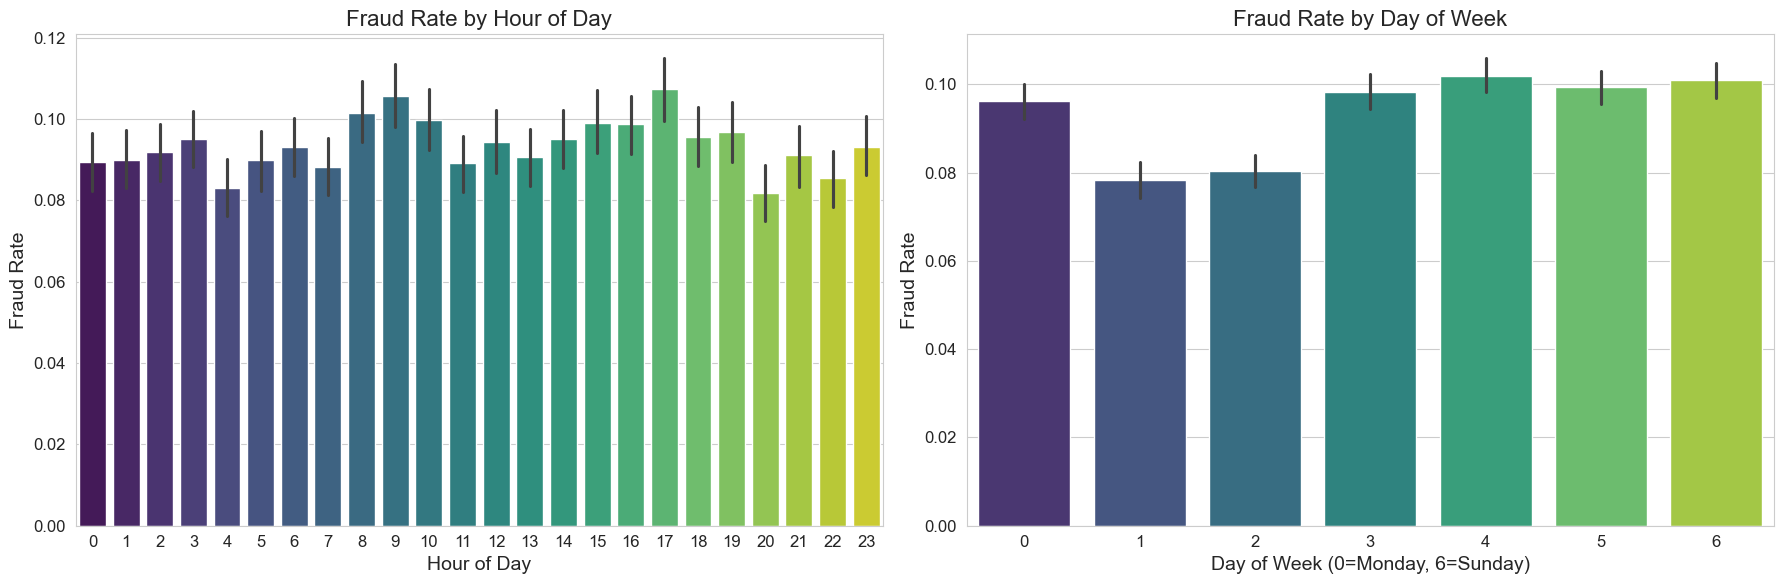

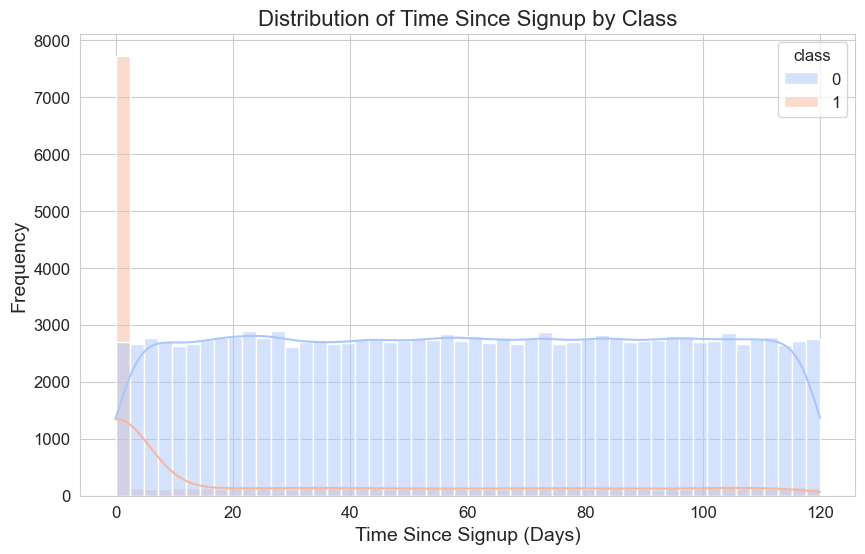

In [11]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 12: EDA - Time-based Features

if merged_fraud_df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Fraud rate by Hour of Day
    sns.barplot(x='hour_of_day', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[0], palette='viridis')
    axes[0].set_title('Fraud Rate by Hour of Day', fontsize=16)
    axes[0].set_xlabel('Hour of Day', fontsize=14)
    axes[0].set_ylabel('Fraud Rate', fontsize=14)

    # Fraud rate by Day of Week
    sns.barplot(x='day_of_week', y='class', data=merged_fraud_df, estimator=np.mean, ax=axes[1], palette='viridis')
    axes[1].set_title('Fraud Rate by Day of Week', fontsize=16)
    axes[1].set_xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=14)
    axes[1].set_ylabel('Fraud Rate', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Relationship between time_since_signup and fraud
    if 'time_since_signup' in merged_fraud_df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=merged_fraud_df, x='time_since_signup', hue='class', bins=50, kde=True, common_norm=False, palette='coolwarm')
        plt.title('Distribution of Time Since Signup by Class', fontsize=16)
        plt.xlabel('Time Since Signup (Days)', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.show()
    else:
        print("'time_since_signup' column not found. Skipping plot.")
else:
    print("DataFrame not available for plotting.")

# 12. Save Processed Data

In [14]:
# notebooks/eda_ecommerce_fraud.ipynb - Cell 13: Save Processed Data (Optional)

import os # Ensure this is imported at the top of the notebook or in this cell

# Assuming 'project_root' variable is defined in Cell 1 (e.g., from os.path.dirname(os.getcwd()))
# If not, add it here:
# current_dir = os.getcwd()
# project_root = os.path.dirname(current_dir)

if merged_fraud_df is not None:
    try:
        # Define the output directory relative to the project root
        relative_output_dir = os.path.join('data', 'processed')
        # Construct the full ABSOLUTE path to the output directory
        full_output_dir = os.path.join(project_root, relative_output_dir)

        # Create the directory if it doesn't exist (using the full absolute path)
        os.makedirs(full_output_dir, exist_ok=True)

        # Define the full output file path
        output_filepath = os.path.join(full_output_dir, 'processed_ecommerce_fraud.csv')

        merged_fraud_df.to_csv(output_filepath, index=False)
        print(f"\nProcessed e-commerce fraud data saved to {output_filepath}")
    except Exception as e:
        print(f"Error saving processed data: {e}")
else:
    print("No processed DataFrame to save.")


Processed e-commerce fraud data saved to c:\Users\skibret\Downloads\KAIM\Week 8\Project\fraud_detection_project\data\processed\processed_ecommerce_fraud.csv
